In [1]:
import scanpy as sc

In [2]:
adata1 = sc.read_h5ad('../dataset_full/GSE197268_5k.h5ad')
adata1

AnnData object with n_obs × n_vars = 183149 × 5000
    obs: 'cell_ids', 'patient', 'batch', 'perturbation'
    var: 'gene_ids', 'gene_symbols'

In [3]:
adata.obs.perturbation

NameError: name 'adata' is not defined

In [ ]:
adata1.obs['perturbation'] = adata1.obs['perturbation'].astype('category')

In [11]:
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)
sc.tl.rank_genes_groups(adata, 'perturbation', method='wilcoxon')


/home/pany3/anaconda3/envs/scleap/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


KeyError: "None of [Index(['your_group_of_interest'], dtype='object')] are in the [columns]"

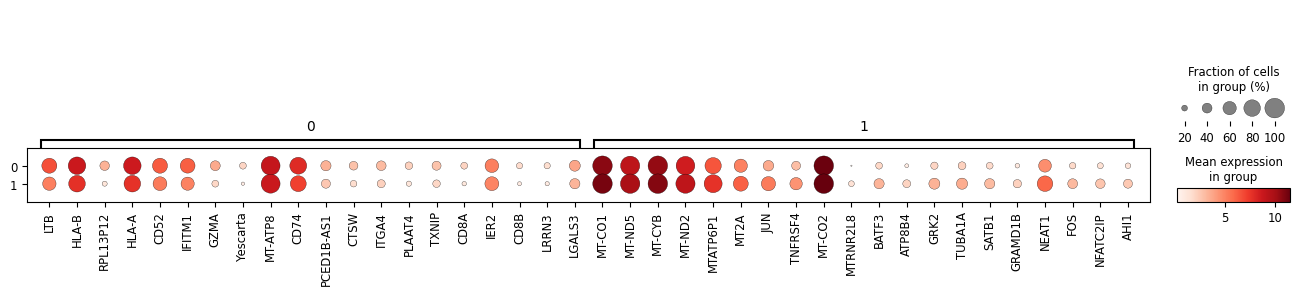

In [14]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=20)

In [4]:
adata2 = sc.read_h5ad('../dataset_full/lymphoma_5k.h5ad')
adata2.obs['perturbation'] = adata2.obs['perturbation'].astype('category')
# sc.pp.normalize_total(adata, target_sum=1e6)
# sc.pp.log1p(adata)
# sc.tl.rank_genes_groups(adata, 'perturbation', method='wilcoxon')
# sc.pl.rank_genes_groups_dotplot(adata, n_genes=20)

In [5]:
adata1.obs['batch'] = 'batch_1'
adata2.obs['batch'] = 'batch_2'

In [6]:
adata = adata1.concatenate(adata2, batch_key='batch')

/tmp/ipykernel_1889056/670988434.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata1.concatenate(adata2, batch_key='batch')


In [7]:
sc.pp.normalize_total(adata, target_sum=1e4)  # Normalize counts per cell
sc.pp.log1p(adata)

/home/pany3/anaconda3/envs/scleap/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [27]:
import scanpy.external as sce

sce.pp.mnn_correct(adata, batch_key='batch')


((AnnData object with n_obs × n_vars = 242146 × 1298
      obs: 'cell_ids', 'patient', 'batch', 'perturbation', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'percent.ribo', 'barcode', 'raw_clonotype_id', 'chain', 'v_gene', 'j_gene', 'd_gene', 'c_gene', 'productive', 'RNA_snn_res.0.4', 'RNA_snn_res.0.8', 'seurat_clusters', 'S.Score', 'G2M.Score', 'Phase', 'HeatShock.Score1', 'Doublet_Singlet', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'mapping.score', 'ident'
      var: 'gene_ids-0', 'gene_symbols-0'
      uns: 'log1p',),
 [],
 [])

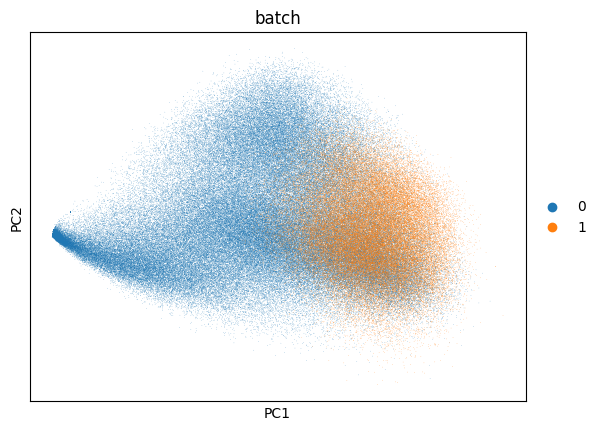

/home/pany3/anaconda3/envs/scleap/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyError: 'Could not find key cell_type in .var_names or .obs.columns.'

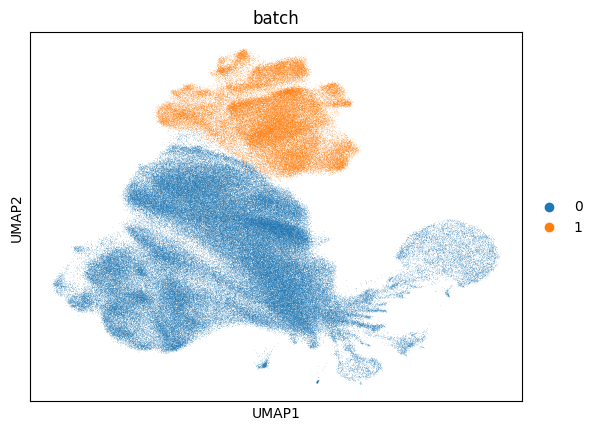

In [30]:
sc.tl.pca(adata)
sc.pl.pca_scatter(adata, color='batch')
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['batch', 'perturbation'])

TypeError: bad operand type for unary -: 'str'

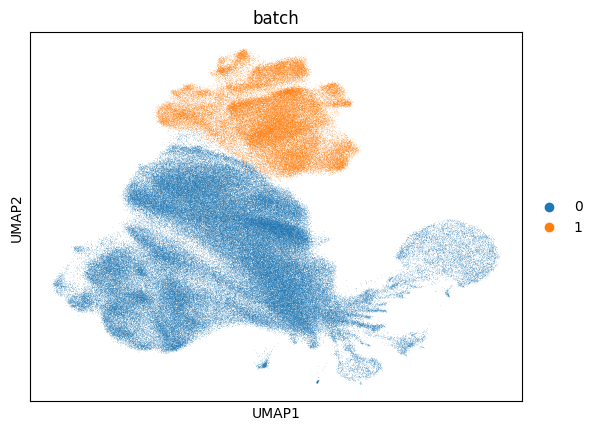

In [32]:
sc.pl.umap(adata, color=['batch', 'patient'])

In [35]:
adata.obs.patient

AAACCTGAGAAGAAGC-1-9-0             30
AAACCTGAGTGTACCT-1-9-0             30
AAACCTGCATTATCTC-1-9-0             30
AAACCTGGTAGAAAGG-1-9-0             30
AAACCTGGTCGGATCC-1-9-0             30
                                 ... 
TTTGTCATCCACGAAT-248-TDN-pos-1    248
TTTGTCATCGCGGATC-248-TDN-pos-1    248
TTTGTCATCTACTTAC-248-TDN-pos-1    248
TTTGTCATCTCGTTTA-248-TDN-pos-1    248
TTTGTCATCTGTCAAG-248-TDN-pos-1    248
Name: patient, Length: 242146, dtype: object

In [12]:
import scanpy.external as sce
sc.tl.pca(adata, svd_solver='arpack')
sce.pp.harmony_integrate(
    adata,
    key='batch',  # Column in adata.obs with batch labels
    basis='X_pca',  # PCA embeddings to correct
    adjusted_basis='X_pca_harmony',  # Stores corrected PCs
    max_iter_harmony=20  # Increase for complex batch effects
)

2025-03-18 10:21:44,452 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-18 10:21:56,228 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-18 10:21:56,978 - harmonypy - INFO - Iteration 1 of 20
2025-03-18 10:22:57,429 - harmonypy - INFO - Iteration 2 of 20
2025-03-18 10:23:57,771 - harmonypy - INFO - Converged after 2 iterations


/home/pany3/anaconda3/envs/scleap/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


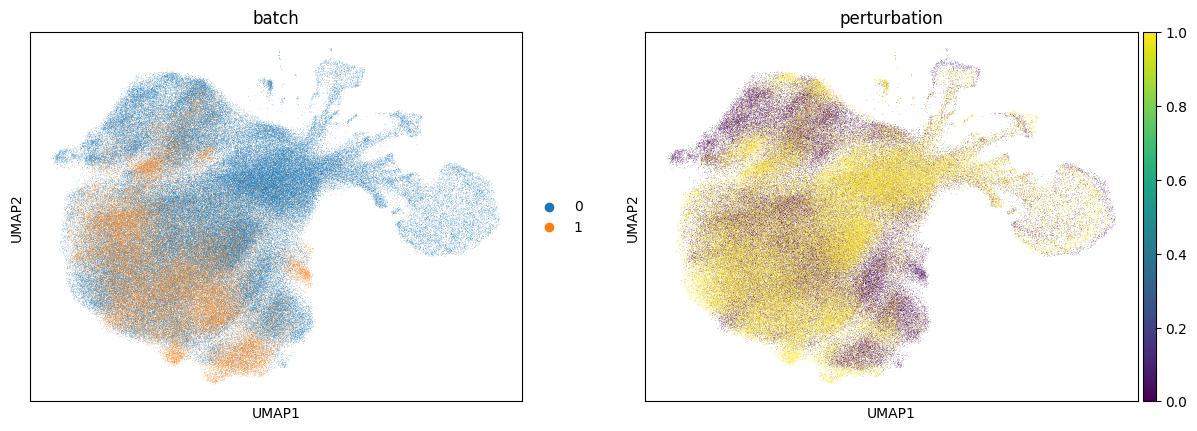

In [13]:
sc.pp.neighbors(adata, n_pcs=30, use_rep='X_pca_harmony')

# UMAP visualization
sc.tl.umap(adata)
sc.pl.umap(adata, color=['batch', 'perturbation'])

In [14]:
adata1 = sc.read_h5ad('../dataset_full/GSE197268_5k.h5ad')
adata2 = sc.read_h5ad('../dataset_full/li_5k.h5ad')
adata3 = sc.read_h5ad('../dataset_full/Deng_5k.h5ad')

In [61]:
adata1 = sc.read_h5ad('/home/pany3/pany3/dataset/GSE197268/GSE197268.h5ad')
# adata2 = sc.read_h5ad('../dataset_full/li_5k.h5ad')
adata3 = sc.read_h5ad('/home/pany3/pany3/dataset/GSE150992/GSE150992.h5ad')

/home/pany3/anaconda3/envs/scleap/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [58]:
adata1.obs['perturbation'] = adata1.obs['perturbation'].astype('category')
# adata2.obs['perturbation'] = adata2.obs['perturbation'].astype('category')
adata3.obs['perturbation'] = adata3.obs['perturbation'].astype('category')

In [32]:
adata3.X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7306489 stored elements and shape (126314, 32645)>

In [33]:
adata1.obs['data'] = 'Haradhvala'
adata3.obs['data'] = 'Deng'
adata = adata1.concatenate(adata3, batch_key='batch')
adata

/tmp/ipykernel_4160333/2883475560.py:3: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata1.concatenate(adata3, batch_key='batch')
/home/pany3/anaconda3/envs/scleap/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/pany3/anaconda3/envs/scleap/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/pany3/anaconda3/envs/scleap/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_dupli

AnnData object with n_obs × n_vars = 309463 × 20546
    obs: 'cell_ids', 'patient', 'batch', 'perturbation', 'data'
    var: 'gene_ids-0', 'gene_symbols-0'

In [9]:
adata.obs_names

Index(['AAACCTGAGAAGAAGC-1-9-0', 'AAACCTGAGTGTACCT-1-9-0',
       'AAACCTGCATTATCTC-1-9-0', 'AAACCTGGTAGAAAGG-1-9-0',
       'AAACCTGGTCGGATCC-1-9-0', 'AAACCTGGTCTAGTCA-1-9-0',
       'AAACCTGGTCTGGTCG-1-9-0', 'AAACCTGGTTTGTTTC-1-9-0',
       'AAACCTGTCTTTCCTC-1-9-0', 'AAACGGGAGCCACCTG-1-9-0',
       ...
       'TTTGTCAAGCCCTAAT-1-1', 'TTTGTCAAGCGATATA-1-1', 'TTTGTCAAGGCATTGG-1-1',
       'TTTGTCAAGGCTATCT-1-1', 'TTTGTCACAGATGGGT-1-1', 'TTTGTCAGTAGAAAGG-1-1',
       'TTTGTCAGTCGCGAAA-1-1', 'TTTGTCAGTCTCTTTA-1-1', 'TTTGTCATCGAATGGG-1-1',
       'TTTGTCATCTGTCTCG-1-1'],
      dtype='object', name='cell_ids', length=309463)

In [10]:
adata.obs

,cell_ids,patient,batch,perturbation,data
cell_ids,,,,,
AAACCTGAGAAGAAGC-1-9-0,AAACCTGAGAAGAAGC-1-9,30,0,1,Haradhvala
AAACCTGAGTGTACCT-1-9-0,AAACCTGAGTGTACCT-1-9,30,0,1,Haradhvala
AAACCTGCATTATCTC-1-9-0,AAACCTGCATTATCTC-1-9,30,0,1,Haradhvala
AAACCTGGTAGAAAGG-1-9-0,AAACCTGGTAGAAAGG-1-9,30,0,1,Haradhvala
AAACCTGGTCGGATCC-1-9-0,AAACCTGGTCGGATCC-1-9,30,0,1,Haradhvala
...,...,...,...,...,...
TTTGTCAGTAGAAAGG-1-1,TTTGTCAGTAGAAAGG-1,03,1,0,Deng
TTTGTCAGTCGCGAAA-1-1,TTTGTCAGTCGCGAAA-1,03,1,0,Deng
TTTGTCAGTCTCTTTA-1-1,TTTGTCAGTCTCTTTA-1,03,1,0,Deng


In [59]:
adata.obs['patient'] = adata.obs['patient'].astype('category')
adata.obs['batch'] = adata.obs['batch'].astype('category')
# for layer in adata.obs:
#     adata.obs[layer] = adata.obs[layer].astype('string')
# adata.obs = adata.obs.drop(columns=['cell_ids'])

In [52]:
from scipy.sparse import csr_matrix
adata.var_names_make_unique()
adata.obs_names_make_unique()
adata.X = csr_matrix(adata.X)
adata.write_h5ad("../dataset_full/harad_deng.h5ad")

In [48]:
adata

AnnData object with n_obs × n_vars = 309463 × 20546
    obs: 'cell_ids', 'patient', 'batch', 'perturbation', 'data'
    var: 'gene_ids-0', 'gene_symbols-0'

In [26]:
adata.obs

,original_cell_ids,patient,batch,perturbation,data
cell_ids,,,,,
AAACCTGAGAAGAAGC-1-9-0,AAACCTGAGAAGAAGC-1-9,30,0,1,Haradhvala
AAACCTGAGTGTACCT-1-9-0,AAACCTGAGTGTACCT-1-9,30,0,1,Haradhvala
AAACCTGCATTATCTC-1-9-0,AAACCTGCATTATCTC-1-9,30,0,1,Haradhvala
AAACCTGGTAGAAAGG-1-9-0,AAACCTGGTAGAAAGG-1-9,30,0,1,Haradhvala
AAACCTGGTCGGATCC-1-9-0,AAACCTGGTCGGATCC-1-9,30,0,1,Haradhvala
...,...,...,...,...,...
TTTGTCAGTAGAAAGG-1-1,TTTGTCAGTAGAAAGG-1,03,1,0,Deng
TTTGTCAGTCGCGAAA-1-1,TTTGTCAGTCGCGAAA-1,03,1,0,Deng
TTTGTCAGTCTCTTTA-1-1,TTTGTCAGTCTCTTTA-1,03,1,0,Deng


In [51]:
adata.obs['patient'] = adata.obs['patient'].astype(str)
adata.obs['batch'] = adata.obs['batch'].astype(str)
adata.obs['data'] = adata.obs['data'].astype(str)
adata.obs['perturbation'] = adata.obs['perturbation'].astype(str)
adata.obs['original_cell_ids'] = adata.obs['original_cell_ids'].astype(str)

In [49]:
adata.obs = adata.obs.rename(columns={'cell_ids': 'original_cell_ids'})

# Now safely reset index
# adata.obs = adata.obs.reset_index()

# Verify
print(adata.obs) 

                           original_cell_ids patient batch perturbation  \
cell_ids                                                                  
AAACCTGAGAAGAAGC-1-9-0  AAACCTGAGAAGAAGC-1-9      30     0            1   
AAACCTGAGTGTACCT-1-9-0  AAACCTGAGTGTACCT-1-9      30     0            1   
AAACCTGCATTATCTC-1-9-0  AAACCTGCATTATCTC-1-9      30     0            1   
AAACCTGGTAGAAAGG-1-9-0  AAACCTGGTAGAAAGG-1-9      30     0            1   
AAACCTGGTCGGATCC-1-9-0  AAACCTGGTCGGATCC-1-9      30     0            1   
...                                      ...     ...   ...          ...   
TTTGTCAGTAGAAAGG-1-1      TTTGTCAGTAGAAAGG-1      03     1            0   
TTTGTCAGTCGCGAAA-1-1      TTTGTCAGTCGCGAAA-1      03     1            0   
TTTGTCAGTCTCTTTA-1-1      TTTGTCAGTCTCTTTA-1      03     1            0   
TTTGTCATCGAATGGG-1-1-1    TTTGTCATCGAATGGG-1      03     1            0   
TTTGTCATCTGTCTCG-1-1      TTTGTCATCTGTCTCG-1      03     1            0   

                        

In [58]:
adata.obs

,patient,batch,perturbation,data
cell_ids,,,,
AAACCTGAGAAGAAGC-1-9-0,30,0,1,Haradhvala
AAACCTGAGTGTACCT-1-9-0,30,0,1,Haradhvala
AAACCTGCATTATCTC-1-9-0,30,0,1,Haradhvala
AAACCTGGTAGAAAGG-1-9-0,30,0,1,Haradhvala
AAACCTGGTCGGATCC-1-9-0,30,0,1,Haradhvala
...,...,...,...,...
TTTGTCAGTAGAAAGG-1-1,03,1,0,Deng
TTTGTCAGTCGCGAAA-1-1,03,1,0,Deng
TTTGTCAGTCTCTTTA-1-1,03,1,0,Deng


In [36]:
import numpy as np
adata.X = np.nan_to_num(adata.X, posinf=np.nan, neginf=np.nan)  # Replace inf with NaN
adata = adata[:, ~np.isnan(adata.X).any(axis=0)]
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
adata = adata[:, adata.var['highly_variable']].copy()


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [40]:
adata.X.min()

0

In [41]:
adata.obs.patient.value_counts()

patient
27    16186
1     14938
32    14445
21    11785
3     11085
20    10831
5     10138
26    10057
17     9936
14     9389
13     8873
25     8773
02     8051
29     7800
9      7427
10     7307
14     7301
15     7244
23     7149
01     6902
19     6787
24     6491
11     6367
24     6340
23     5819
18     5568
28     5457
21     5192
30     5080
31     4974
22     4850
07     4746
20     4528
09     4426
2      4324
03     4301
08     3783
12     3445
16     3373
04     2888
8      2775
10     1925
05     1807
4      1666
7      1369
15     1291
16     1287
12     1267
19      779
18      308
13      278
17      205
11      150
Name: count, dtype: int64

In [54]:
import random
import time
import pandas as pd
patients = list(adata.obs['patient'].unique())
random.seed(time.time())
selected_patients = random.sample(patients, 20)
# selected_patients = list(['VC09_CD19', 'VC29_CD19', 'VC22_CD19', 'VC01_CD19', 'DC45_CD19'])

test_ad = adata[adata.obs['patient'].isin(selected_patients)]
train_ad = adata[~adata.obs['patient'].isin(selected_patients)]

value_counts = train_ad.obs['perturbation'].value_counts()

n = value_counts.min()

balanced_indices = []
for perturbation in value_counts.index:
    mask = train_ad.obs['perturbation'] == perturbation
    indices = train_ad.obs[mask].index
    sampled_indices = pd.Series(indices).sample(n=n, random_state=42)
    balanced_indices.extend(sampled_indices)

In [55]:
train_ad = train_ad[balanced_indices].copy()

test_perturbation_counts = test_ad.obs['perturbation'].value_counts()
train_perturbation_counts = train_ad.obs['perturbation'].value_counts()


In [56]:
adata.obs

,original_cell_ids,patient,batch,perturbation,data
cell_ids,,,,,
AAACCTGAGAAGAAGC-1-9-0,AAACCTGAGAAGAAGC-1-9,30,0,1,Haradhvala
AAACCTGAGTGTACCT-1-9-0,AAACCTGAGTGTACCT-1-9,30,0,1,Haradhvala
AAACCTGCATTATCTC-1-9-0,AAACCTGCATTATCTC-1-9,30,0,1,Haradhvala
AAACCTGGTAGAAAGG-1-9-0,AAACCTGGTAGAAAGG-1-9,30,0,1,Haradhvala
AAACCTGGTCGGATCC-1-9-0,AAACCTGGTCGGATCC-1-9,30,0,1,Haradhvala
...,...,...,...,...,...
TTTGTCAGTAGAAAGG-1-1,TTTGTCAGTAGAAAGG-1,03,1,0,Deng
TTTGTCAGTCGCGAAA-1-1,TTTGTCAGTCGCGAAA-1,03,1,0,Deng
TTTGTCAGTCTCTTTA-1-1,TTTGTCAGTCTCTTTA-1,03,1,0,Deng


In [62]:
adata1.obs

,cell_ids,patient,batch,perturbation
cell_ids,,,,
AAACCTGAGAAGAAGC-1-9,AAACCTGAGAAGAAGC-1-9,30,0,1
AAACCTGAGTGTACCT-1-9,AAACCTGAGTGTACCT-1-9,30,0,1
AAACCTGCATTATCTC-1-9,AAACCTGCATTATCTC-1-9,30,0,1
AAACCTGGTAGAAAGG-1-9,AAACCTGGTAGAAAGG-1-9,30,0,1
AAACCTGGTCGGATCC-1-9,AAACCTGGTCGGATCC-1-9,30,0,1
...,...,...,...,...
TTTCCTCAGTCGTTTG-1-12,TTTCCTCAGTCGTTTG-1-12,10,1,0
TTTGCGCAGATACACA-1-12,TTTGCGCAGATACACA-1-12,10,1,0
TTTGGTTGTACCATCA-1-12,TTTGGTTGTACCATCA-1-12,10,1,0


In [65]:
# adata1 = sc.read_h5ad('/home/pany3/pany3/dataset/GSE197268/GSE197268.h5ad')
adata3 = sc.read_h5ad('/home/pany3/pany3/dataset/GSE197268/GSE197268_h5ad/GSM5911984_Patient2-D7.h5ad')
adata3

AnnData object with n_obs × n_vars = 3308 × 60671
    obs: 'cell_ids'
    var: 'gene_ids', 'gene_symbols'